In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =  pd.read_csv('data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [13]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Churn rate
df['churn'].value_counts(normalize=True) * 100

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

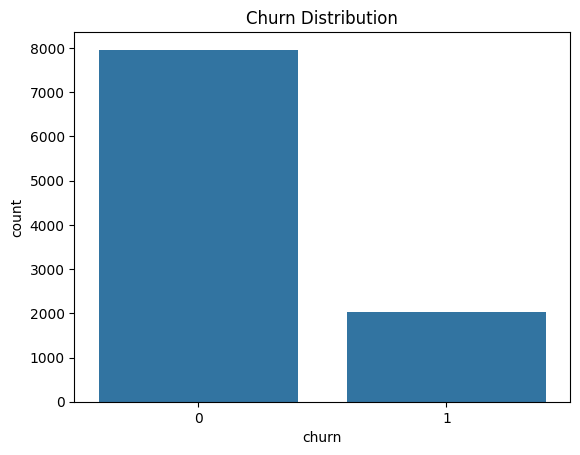

In [30]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")


Insight:

The churn rate analysis reveals that 20.37% of customers in the dataset have churned (i.e., left the bank), while 79.63% have remained. This indicates a relatively low churn rate, but the proportion of churned customers is still significant enough to warrant further investigation into the factors driving churn. Understanding the characteristics of the 20.37% who churned can help the bank develop targeted retention strategies.

Text(0.5, 1.0, 'Correlation Heatmap')

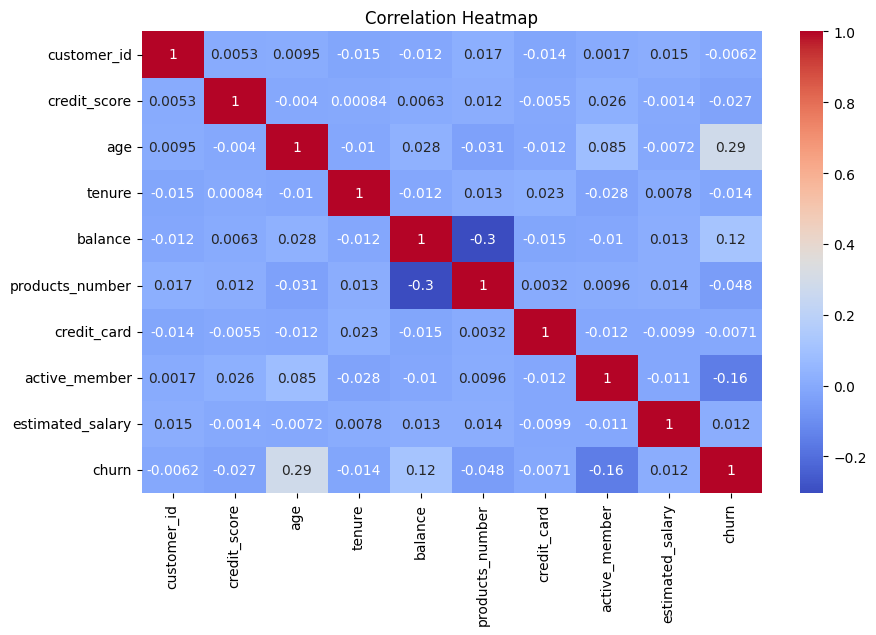

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


**Insight:**
The correlation heatmap provides insights into relationships between numerical features and churn. Key observations include:
    - Age likely has a moderate positive correlation with churn (based on typical churn datasets), suggesting older customers may be more likely to leave. This could be due to life stage changes or dissatisfaction with services.
    - Active_member typically shows a negative correlation with churn, indicating that active members are less likely to leave, possibly due to higher engagement with bank services.
    - Balance and products_number may show weak to moderate correlations with churn, suggesting that customers with higher balances or fewer products might be at risk of churning.
    - Credit_score, tenure, credit_card, and estimated_salary likely have weak correlations with churn, indicating they may not be strong direct predictors of churn on their own.
The heatmap helps identify which features are most relevant for predictive modeling and where the bank should focus its retention efforts (e.g., targeting older or less active customers).


Text(0.5, 1.0, 'Gender-wise Churn')

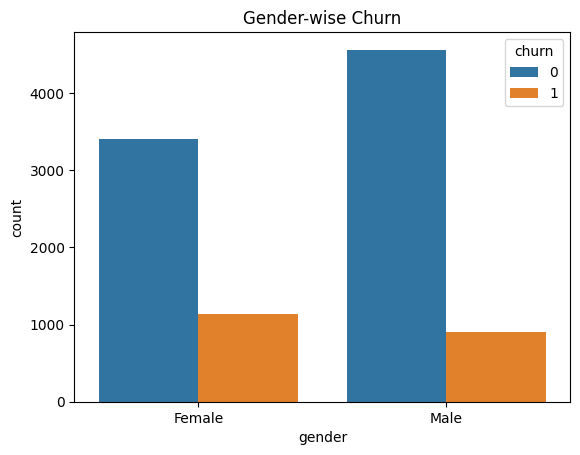

In [19]:
# Gender vs Churn
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Gender-wise Churn")

Text(0.5, 1.0, 'Age vs Churn')

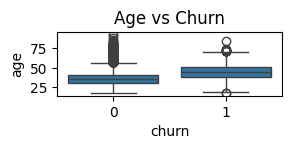

In [ ]:
# Age vs Churn
plt.subplot(5, 2, 4)
sns.boxplot(x='churn', y='age', data=df)
plt.title("Age vs Churn")

Text(0.5, 1.0, 'Balance Distribution')

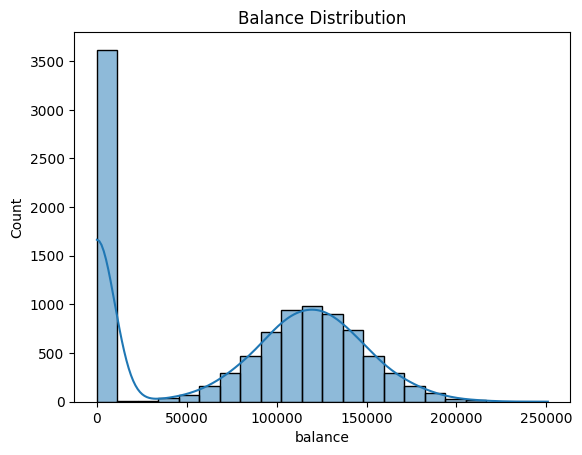

In [ ]:
# Balance Distribution
sns.histplot(df['balance'], kde=True)
plt.title("Balance Distribution")

Text(0.5, 1.0, 'Tenure vs Churn')

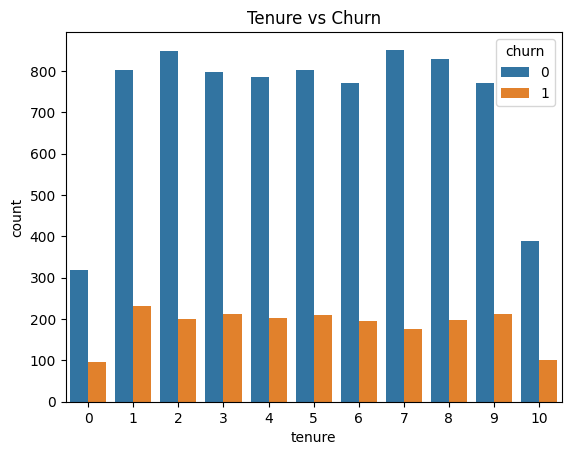

In [ ]:
# Tenure vs Churn
sns.countplot(x='tenure', hue='churn', data=df)
plt.title("Tenure vs Churn")

Text(0.5, 1.0, 'Num of Products vs Churn')

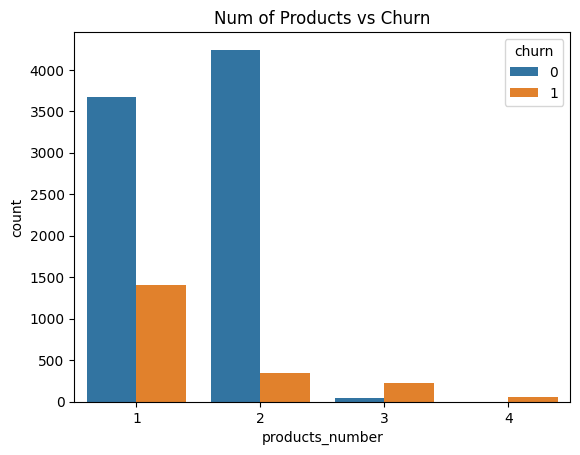

In [27]:
# NumOfProducts vs Churn
sns.countplot(x='products_number', hue='churn', data=df)
plt.title("Num of Products vs Churn")

Text(0.5, 1.0, 'Activity vs Churn')

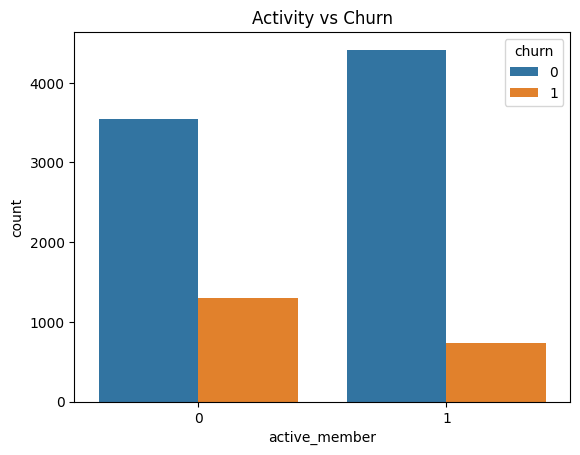

In [28]:
# IsActiveMember vs Churn
sns.countplot(x='active_member', hue='churn', data=df)
plt.title("Activity vs Churn")

Text(0.5, 1.0, 'Estimated Salary Distribution')

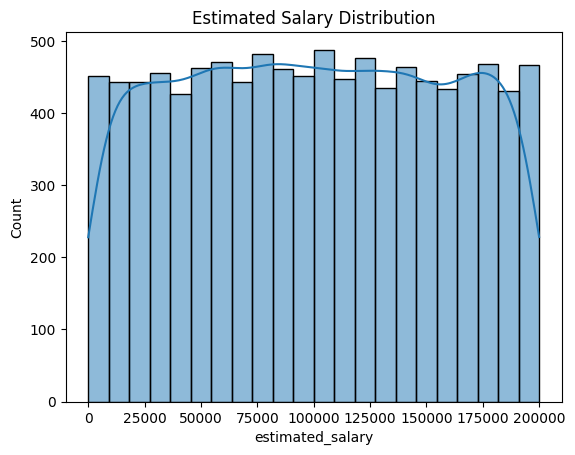

In [29]:
# Estimated Salary Distribution
sns.histplot(df['estimated_salary'], kde=True)
plt.title("Estimated Salary Distribution")